# Exemple d'application :

## Couplage d'un modèle hydrogéologique synthétique Marthe avec Pest++ (pestpp-opt)

#### INTRODUCTION

L'exemple d'application présenté dans ce notebook se base sur une modification du modèle Marthe synthétique nommé **Hallue** extrait du modèle existant sur la Somme [Amraoui et al., 2002](https://hal-mines-paristech.archives-ouvertes.fr/hal-00578522/document). On s’intéresse ici à des questions de gestion quantitative de l’eau souterraine. Le bassin versant est caractérisé par une nappe monocouche avec une rivière (l'Hallue) connectée à l’aquifère coulant en son milieu. Du point de vue usages de l’eau, des prélèvements pour l’irrigation et pour l’eau potable ont lieu dans la nappe. Ces prélèvements sont caractérisés par une variabilité temporelle : la demande d’irrigation est présente uniquement en fin de printemps et en été quand l’évapotranspiration est la plus importante et que la recharge ne suffit pas à satisfaire les demandes. Les consommations d’eau potable sont également plus importantes en été (jardins, piscines, tourisme) même si l’écart est moins important. En été, lorsque le niveau de la nappe baisse, il peut être difficile de satisfaire tous les usages et il peut être nécessaire de procéder à des arbitrages.

Ainsi, la plupart des paramètres régissant le fonctionnement hydrologique de la nappe ont déjà été calibrés : paramètres de la fonction de production pour le calcul du bilan hydroclimatique, perméabilité et porosité de l’aquifère, coefficient d’échange nappe-rivière, etc. Le calcul du bilan hydroclimatique est effectué au pas de temps journalier et le calcul hydrodynamique au pas de temps mensuel.  En termes de conditions aux limites, des charges fixes sont imposées en amont du domaine tandis que les échanges nappe/rivière ont lieu dans les mailles du réseau de rivière avec un niveau de rivière fixe. Les pélèvements en nappe sont représentés par puits de pompage destiné à l'alimentation en eau potable *(`q_aep`)* et un deuxième destiné à l'irriguation agricole *(`q_agri`)*. Le modèle est également constitué d'un prélèvement en rivière *(`q_riv`)*.
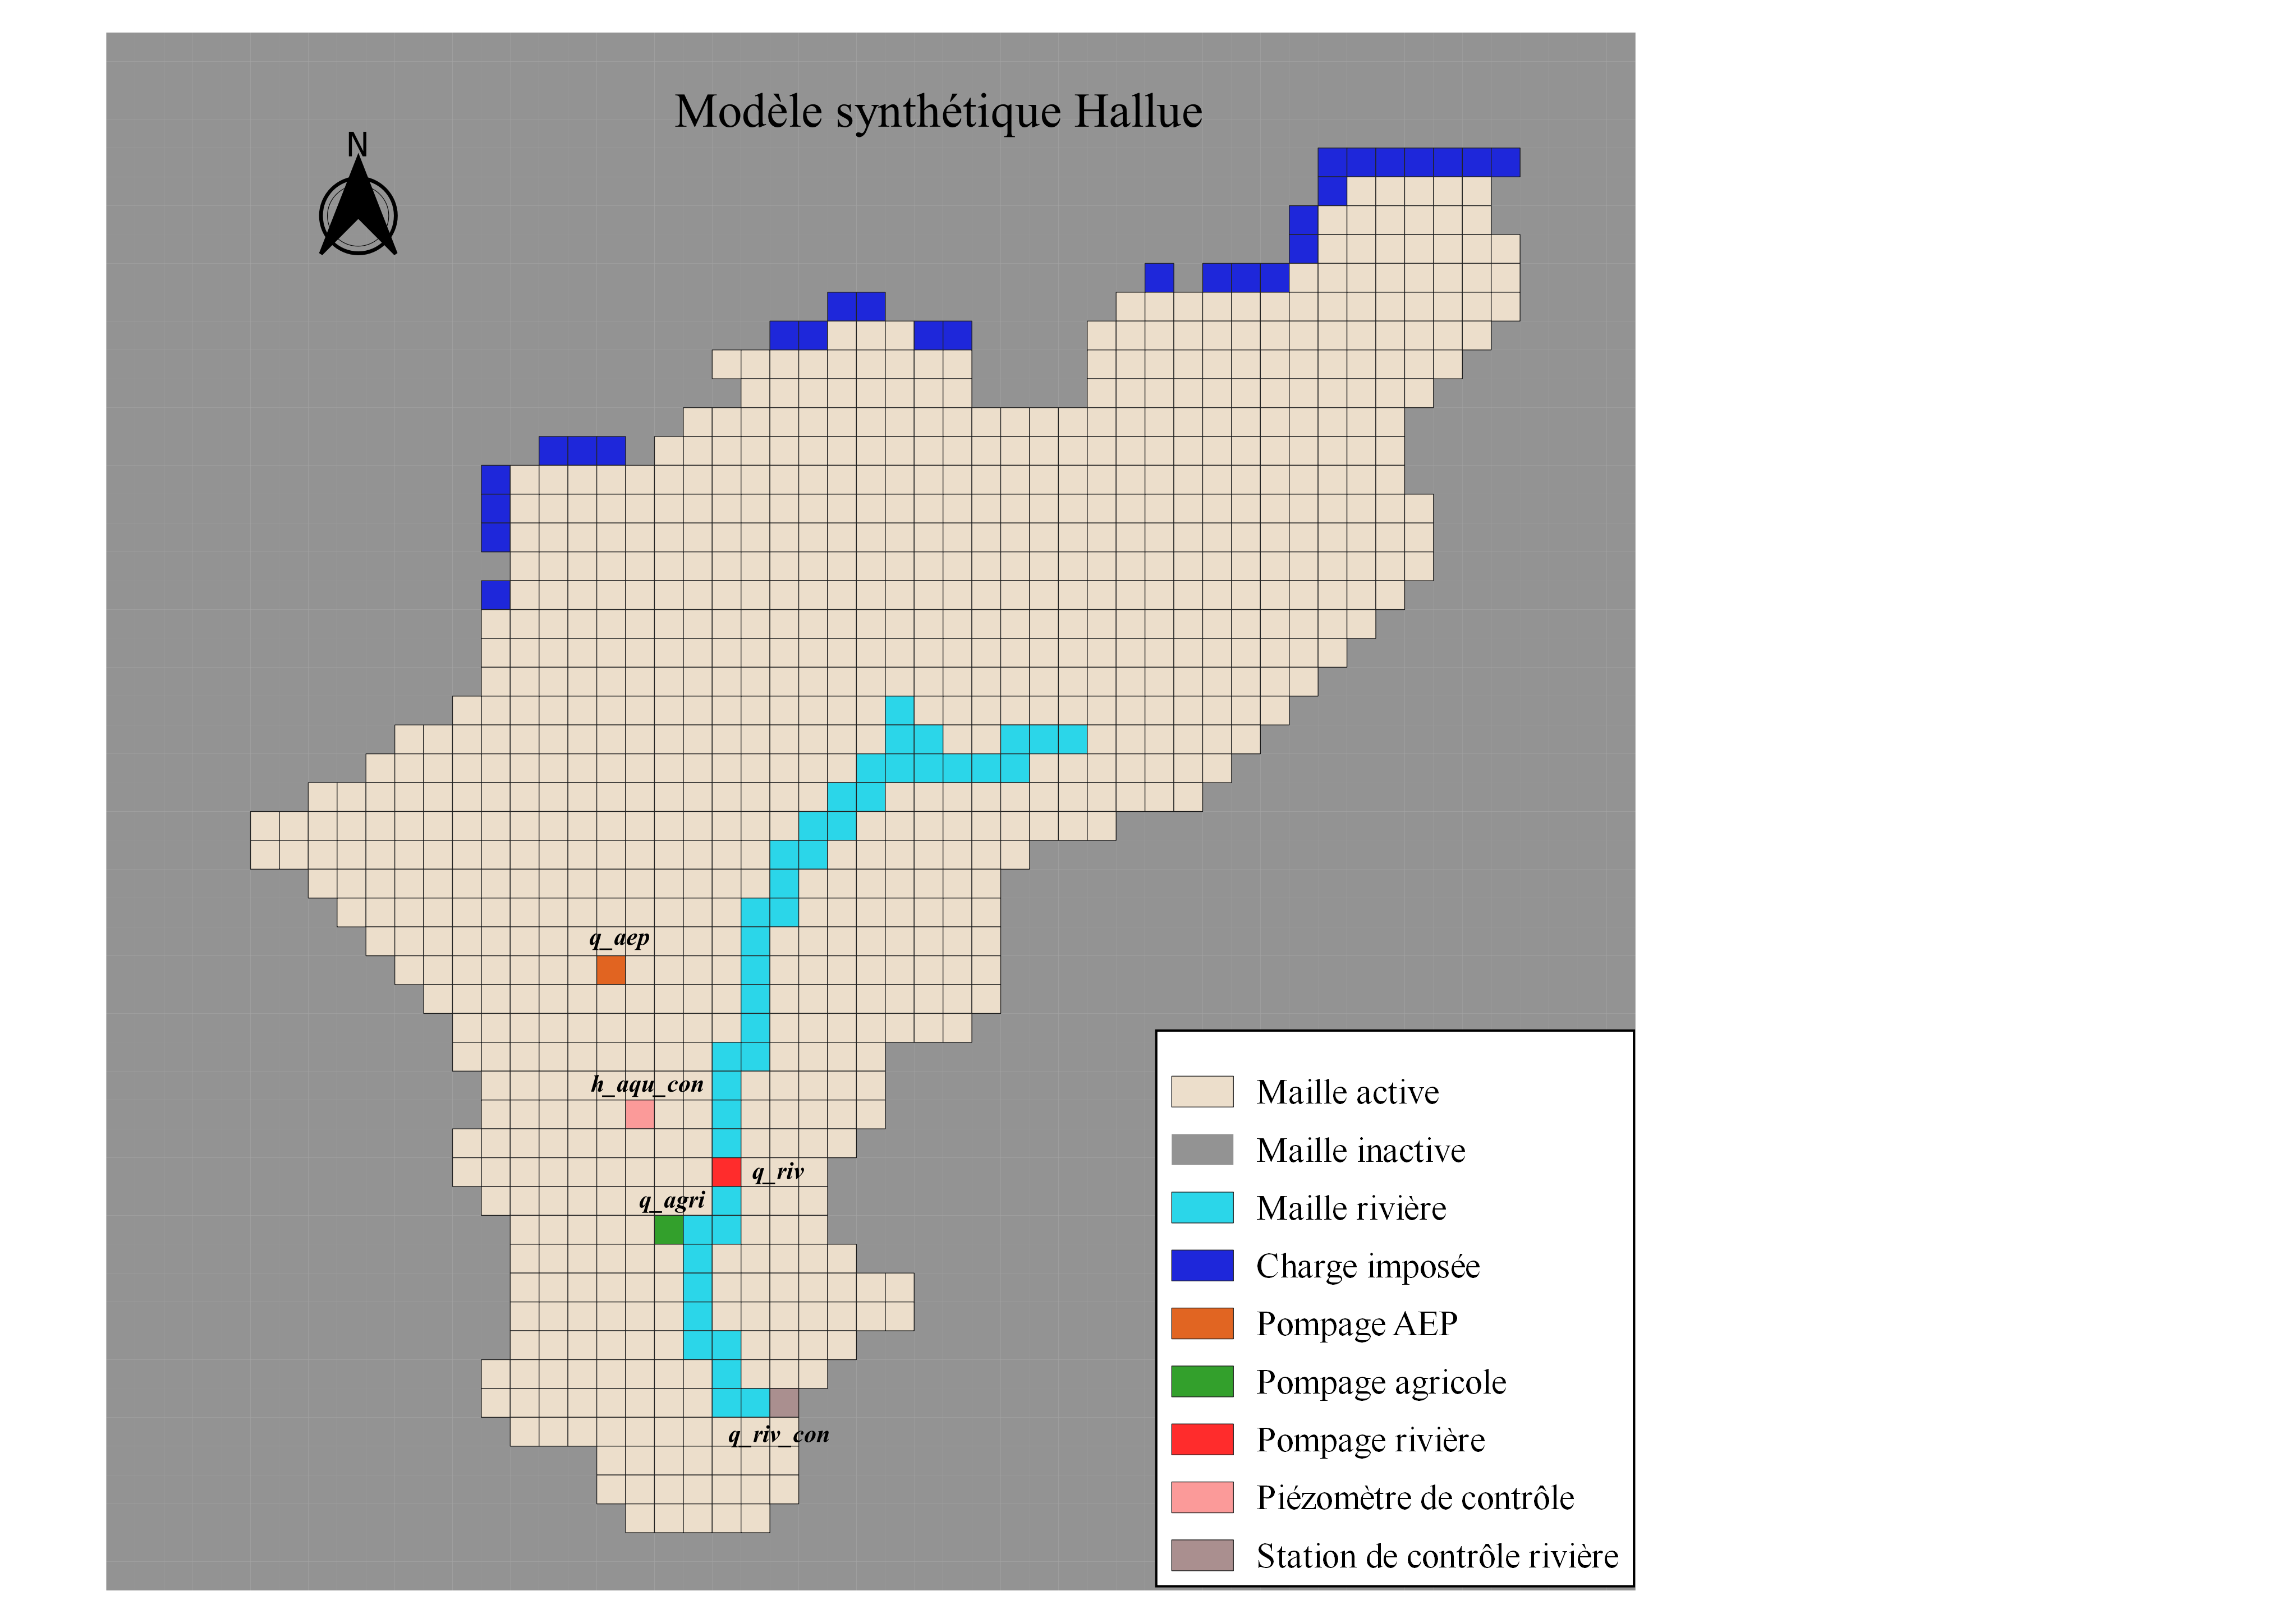

#### OBJECTIFS 

**Maximiser les pompages AEP et agricoles tout en respectant les contraintes suivantes:**

1. **Pour l'exploitation:** 
    - Forage AEP *(`h_aep`)* : **H** > *43.5 mNGF*
    - Forage Agricole *(`h_agri`)* : **H** > *35 mNGF*
    
                               
2. **Objectif environemental:**
    - Piézomètre de contrôle *(`h_con`)*: **H** > *38.2 mNGF*

In [1]:
# ---- Import usefull modules/packages
import os, sys, platform
from zipfile import ZipFile
from shutil import which, copy2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyemu

# ---- Import main librairy
sys.path.append(os.path.normpath(r"E:\EauxSCAR\adeqwat"))
import pymarthe
from pymarthe import MartheModel
from pymarthe import marthe_utils

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 96: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 96: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 96: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 96: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 86: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 86: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 86: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 86: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 90: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 90: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 90: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 90: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 88: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 88: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 88: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 88: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 85: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 96: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 96: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 96: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 96: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 86: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 86: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 86: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 86: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 91: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 90: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 90: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 90: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 90: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 88: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 88: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 88: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "C:\Users\pmatran\anaconda3\lib\site-packages\fiona\env.py", line 283, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 88: invalid continuation byte


In [2]:
'''
# ---- Unzip compress model
mpath = 'hallue_opt'
with ZipFile(f'{mpath}.zip', 'r') as z:
    z.extractall()

for f in os.listdir(mpath):
    src = os.path.join(mpath,f)
    dst = os.getcwd()
    copy2(src,dst)
'''
# ---- Load model
mm = MartheModel('hallue.rma')

'''
# ---- Run initial model
mm.run_model(exe_name='Marth_R8')
'''

"\n# ---- Run initial model\nmm.run_model(exe_name='Marth_R8')\n"

#### ETATS DES LIEUX

Récupération des données des forages AEP/agricole dans le fichier `historiq.prn` et du piézomètre de contrôle afin d'apprécier leurs chroniques de charges hydrauliques.

| Nom | c | l | p | $H_{min}$ (*mNGF*) |
| --- | --- | --- | --- | --- |
| *h_aep* | 18 | 33 | 1 | 43.5 |
| *h_agri* | 20 | 42 | 1 | 35 |
| *h_con* | 19 | 38 | 1 | 38.2 |

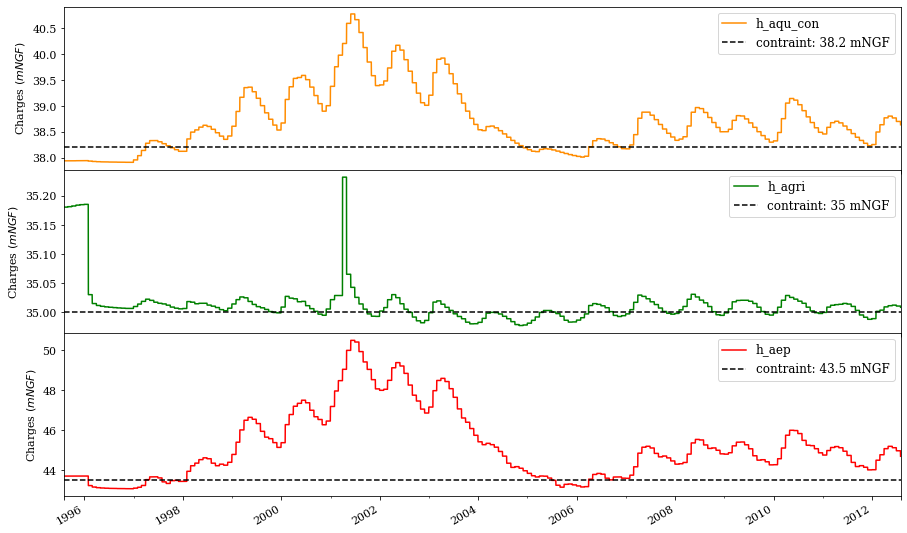

In [3]:
# ---- Fetch simulated head
prn_df = marthe_utils.read_mi_prn('historiq.prn')

# ---- Prepare plot zone
plt.rc('font', family='serif', size=11)
colors = ['darkorange','g','r']

# ---- Define constraints head per well
well_names = list(prn_df.xs('Charge', level = 'type', axis=1).columns)
well_ctr = [38.2,35, 43.5]

# ---- Plot simulated heads
df = prn_df.loc[:,('Charge',well_names)].droplevel(level='type',axis = 1)
axs = df.plot(figsize = (15,10), color=colors,
              subplots=True,legend = False,sharex=True,
              xlabel = '', ylabel = 'Charges $(mNGF)$')
ctr_lines = [ax.axhline(y=i, ls='--' ,c='black',
                        label = f'contraint: {str(i)} mNGF') for ax,i in zip(axs,well_ctr)]

# ---- Manage legend
for ax in axs:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles,labels, loc = 'upper right', fontsize=12)
plt.subplots_adjust(hspace = 0)

#### CREATION DES FICHIERS PEST

Il est nécessaire à présent de lire les données de pompage depuis PyMarthe et d'écrire les fichiers paramètres dans le dossier `/param` et les fichiers *template* de PEST *(`.tpl`)* dans le dossier `/tpl`.

In [4]:
# ---- Define folders
par_dir = 'param'
tpl_dir = 'tpl'

# ---- Add pumping data
mm.add_pump(pastp_file = 'hallue.pastp', mode = 'aquifer')

In [5]:
# ---- Define folders
par_dir = 'param'
tpl_dir = 'tpl'

# ---- Add pumping data
mm.add_pump(pastp_file = 'hallue.pastp', mode = 'aquifer')

# ---- Writing pumping data in standard parameter files
mm.aqpump.write_param(prefix='pump', param_dir=par_dir)

# ---- Writing pumping data in standard template files
mm.aqpump.write_tpl(prefix='pump', tpl_dir=tpl_dir)

# ---- Print writen files
print('Parameter files:{0}{1}{0}{2}'.format('\n\t- ',*[os.path.join(par_dir,f) for f in os.listdir(par_dir)]))
print('tpl files:{0}{1}{0}{2}'.format('\n\t- ',*[os.path.join(tpl_dir,f) for f in os.listdir(tpl_dir)]))

Parameter files:
	- param\pump_q_aep.dat
	- param\pump_q_agri.dat
tpl files:
	- tpl\pump_q_aep.tpl
	- tpl\pump_q_agri.tpl


Note: Il est possible d'écrire les fichiers paramètres et *template* puits par puits en renseignant le nom du puits souhaité dans l'argument `boundname`.

Les contraintes d'exploitation et environementales sont définis selon des charges hydrauliques maximales dans les puits/piézomètres `h_aep`, `h_agri` et `h_con`. L'objectif est tout d'abord d'écrire les charges simulées ainsi que les  fichiers *instruction* correspondant puis de réaliser la même opération avec cette fois les valeurs contraintes/limites.

In [6]:
# ---- Define contraint dictionary and directories
ctr_dic = {k:v for k,v in zip(well_names, well_ctr)}  # format: {well_name : contraint (in mNGF)}
obs_dir, sim_dir, ins_dir = 'obs', 'sim', 'ins'

# ---- Fetch/Write simulated data
head_df = marthe_utils.read_mi_prn('historiq.prn').xs('Charge',level='type', axis=1)

for wn in head_df.columns:
    # ---- Write in 'sim' directory
    head_df[wn].to_csv(os.path.join(sim_dir, f'{wn}.dat'),
                       sep = '\t', header=False, index=True)
    # ---- Write in 'obs' directory
    obsfile = os.path.join(obs_dir, f'{wn}.dat')
    head_df[wn].to_csv(obsfile, sep = '\t', header=True, index=True)

# ---- Write observation/instruction file
mm.setup_ins()

Reading history file hallue.histo
Found 3 observation history files in obs
11 simulated locations found for layer 1
Found 11 simulated history locations over selected model layers
3 simulation locations considered with observed counterparts
Generating instruction files for PEST...


#### CONSTRUCTION DU PST (Pest Control File)

Construction du `pst` à partir des fichier simulés, paramètres, instructions et *templates*.

In [7]:
# ---- Colect all pest files
tpl_files = [os.path.join(tpl_dir,f) for f in os.listdir(tpl_dir)]
par_files = [os.path.join(par_dir,f) for f in os.listdir(par_dir)]
sim_files = [os.path.join(sim_dir,f) for f in os.listdir(sim_dir)]
ins_files = [os.path.join(ins_dir,f) for f in os.listdir(ins_dir)]

# ---- Print generated files
for header, files in zip(['tpl','par', 'ins', 'sim'],[tpl_files, par_files, ins_files, sim_files]):
    print(f'{header} files:')
    for f in files:
        print(f'\t- {f}')

tpl files:
	- tpl\pump_q_aep.tpl
	- tpl\pump_q_agri.tpl
par files:
	- param\pump_q_aep.dat
	- param\pump_q_agri.dat
ins files:
	- ins\h_aep.ins
	- ins\h_agri.ins
	- ins\h_aqu_con.ins
sim files:
	- sim\h_aep.dat
	- sim\h_agri.dat
	- sim\h_aqu_con.dat


In [8]:
# ---- Create pst
pst = pyemu.utils.pst_from_io_files(tpl_files, par_files, ins_files, sim_files)

C:\Users\pmatran\anaconda3\lib\site-packages\pyemu\pst\pst_utils.py:759: UserWarning: error processing instruction file ins\h_aep.ins, trying inschek: InstructionFile error processing output file on line number 1: unrecognized instruction '(loc001n0001)12:21' on ins file line 2
  warnings.warn(


error using inschek for instruction file ins\h_aep.ins:[Errno 2] No such file or directory: '.\\ins\\h_aep.obf'
observations in this instruction file will havegeneric values.


C:\Users\pmatran\anaconda3\lib\site-packages\pyemu\pst\pst_utils.py:759: UserWarning: error processing instruction file ins\h_agri.ins, trying inschek: InstructionFile error processing output file on line number 1: unrecognized instruction '(loc002n0001)12:21' on ins file line 2
  warnings.warn(


error using inschek for instruction file ins\h_agri.ins:[Errno 2] No such file or directory: '.\\ins\\h_agri.obf'
observations in this instruction file will havegeneric values.


C:\Users\pmatran\anaconda3\lib\site-packages\pyemu\pst\pst_utils.py:759: UserWarning: error processing instruction file ins\h_aqu_con.ins, trying inschek: InstructionFile error processing output file on line number 1: unrecognized instruction '(loc003n0001)12:21' on ins file line 2
  warnings.warn(


error using inschek for instruction file ins\h_aqu_con.ins:[Errno 2] No such file or directory: '.\\ins\\h_aqu_con.obf'
observations in this instruction file will havegeneric values.


#### AJUSTEMENT DES PARAMETRES

Les données de pompages initiales doivent être insérés (argument `parval1`) dans la section *paramètre* du `pst` en précisant un nom pour chaque groupe de paramètre (argument `pargp`). 
Note: un groupe de paramètre est constitué par puits de pompage.

In [11]:
# ---- Fetch parameter groups
pargps = mm.aqpump.get_boundnames()

# ---- Set decision values initial value and parameter groups
for pargp in pargps:
    # -- Fetch parameter initial values
    parval1 = mm.aqpump.read_param(os.path.join(par_dir, f'pump_{pargp}.dat'))['v']
    # -- Set data in pst.parameter_data DataFrame
    pdf = pst.parameter_data
    mask = pdf.index.str.contains(pargp)
    cols = ['partrans', 'parval1', 'parlbnd', 'parubnd', 'pargp']
    pdf.loc[mask,cols] = np.array(['none' , parval1, -3e4 , 0, pargp], dtype=object)
    
# ---- Print parameter data
display(pst.parameter_data.head())

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
pump_q_aep_0000,pump_q_aep_0000,none,factor,0.0,-30000.0,0.0,q_aep,1.0,0.0,1
pump_q_aep_0001,pump_q_aep_0001,none,factor,0.0,-30000.0,0.0,q_aep,1.0,0.0,1
pump_q_aep_0002,pump_q_aep_0002,none,factor,0.0,-30000.0,0.0,q_aep,1.0,0.0,1
pump_q_aep_0003,pump_q_aep_0003,none,factor,0.0,-30000.0,0.0,q_aep,1.0,0.0,1
pump_q_aep_0004,pump_q_aep_0004,none,factor,0.0,-30000.0,0.0,q_aep,1.0,0.0,1


#### AJUSTEMENT DES OBSERVATIONS

Les données d'observations de charges dans les puits (AEP, agricole et contrôle) issues des simulations du modèles sont  soumises à des contraintes. Pour rendre compte de ces contraintes il est nécessaire d'attribuer à ces observations un poids nul (`weight = 0`) et d'ajouter des observations de contraintes ayant un poids unitaire (`weight = 1`) et une valeur correspondant à la charge hydraulique minimale (`obsval = h_min`). Le nom du groupe d'observation doit faire apparaître notre souhait de dépassement ou non dépassement de la valeur. Pour le cas présent, on souhaite optimiser les pompages pour que la charge hydraulique dans un puits de pompage donné soit **plus grande** que la valeur de contrainte `h_min`.

Note: Les préfixes possibles pour les noms de groupes d'observations de contraintes:

| Préfixe | Signification | Expression | Example |
| --- | --- | --- | --- |
| *l_* ou *less_* | plus petit | $var_{sim}$ < $contrainte$ | l_p_agri |
| *g_* ou *greater_* | plus grand | $var_{sim}$ > $contrainte$ | g_p_agri |


In [12]:
# ---- Set observation values, weights and groups
for loc_nme, ctr_val in ctr_dic.items():
    
    # ---- fetch loc number from loc_name
    loc_mask = mm.obs[loc_nme].df.index
    
    # ---- Set data of constraint observations
    # Format: value = constraint, weight = 1, group =['g_' or 'greater_'] + 'h_loc_nme'
    pst.observation_data.loc[loc_mask,['obsval', 'weight', 'obgnme']] = [ctr_val, 1.,f'g_{loc_nme}']

#### DEFINITION DES PARAMETRES DE CONTRÔLE

In [13]:
# ---- Number of SLP iterations
pst.control_data.noptmax = 1

# ---- Set command line to launch model
pst.model_command = ['model.sh'] if platform.system() == 'Linux' else ['model.bat']

#### DEFINITION DES OPTIONS D'OPTIMISATION

In [14]:
# ---- Set decision variable
pst.pestpp_options['opt_dec_var_groups'] = mm.aqpump.get_boundnames()

# ---- Set optimisation direction ('min' or 'max')
pst.pestpp_options['opt_direction'] = 'min'    # Maximise pumping defined by negative values (withdraw from aquifer)

# ---- Set the constraint groups names
ctr_groups = list(pst.observation_data.loc[pst.observation_data.obgnme.str.startswith('g_'), 'obgnme'].unique())
pst.pestpp_options['opt_constraint_groups'] = ctr_groups

# ---- Set level of verbosity of solution information recorded by optimization library functions
pst.pestpp_options['opt_coin_log'] = 4

# ---- Force re-calculating calibration Jacobian matrix during every iteration
pst.pestpp_options['opt_recalc_chance_every'] = 1

# ---- User's disposition with respect to risk
pst.pestpp_options['opt_risk'] = 0.5   # Neutral risk

#pst.pestpp_options['parcov'] = 'prior_cov_matrix.jcb'

#### ECRITURE DU PST

In [15]:
pst.write('test_hallue.pst')

noptmax:2, npar_adj:12422, nnz_obs:18633
